## I. Importing libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## II. Loading dataset

In [2]:
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


About this dataset:
- 'age': Age of patient
- 'sex': Gender (0: Female, 1: Male)
- 'cp': Chest Pain type
  + 0: Typical angina
  + 1: Atypical angina
  + 2: Non-anginal pain
  + 3: Asymptomatic
- 'trestbps': Resting blood pressure (in mm Hg).
- 'chol': Serum cholesterol in mg/dL.
- 'fbs': fasting blood sugar > 120 mg/dL
  + 1 = true 
  + 0 = false.
- 'restecg': resting electrocardiographic results
  + 0: Normal
  + 1: ST-T wave abnormality
  + 2: Left ventricular hypertrophy
- 'thalach': Maximum heart rate achieved.
- 'exang': Exercise-induced angina (1 = yes, 0 = no).
- 'oldpeak': ST depression induced by exercise relative to rest.
- 'slope': The slope of the peak exercise ST segment
  + 0: Upsloping
  + 1: Flat
  + 2: Downsloping
- 'ca': Number of major vessels colored by fluoroscopy.
- 'thal':
  + 0: Normal
  + 1: Fixed defect
  + 2: Reversible defect
- 'target': Diagnosis of heart disease (1 = disease, 0 = no disease).

## III. Exploring dataset

### 1. Statistics

In this case, we will understand the basic statistics for each feature.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 2. Correlation Heatmap

In [5]:
correlationMatrix = df.corr()
correlationMatrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


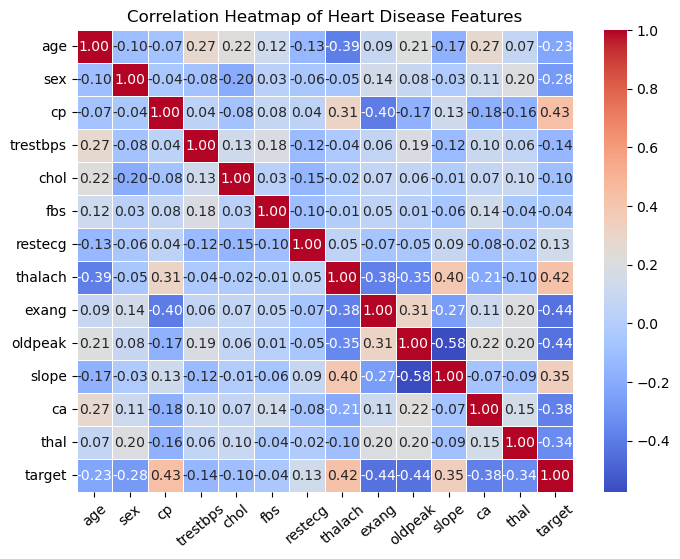

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xticks(rotation=40)
plt.title('Correlation Heatmap of Heart Disease Features')
plt.show()

### 3. Target Distribution

C:\Users\tranl\AppData\Local\Temp\ipykernel_13012\1171702001.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['target'], palette={'0': 'aqua', '1': 'darksalmon'})


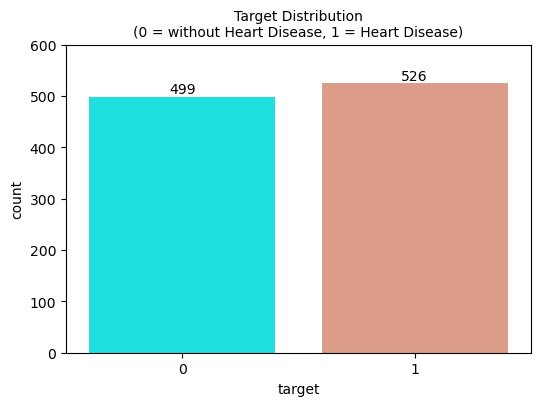

In [7]:
withHeartDisease = len(df[df.target==1])
withoutHeartDisease = len(df[df.target==0])

plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df['target'], palette={'0': 'aqua', '1': 'darksalmon'})
ax.annotate(f'{withoutHeartDisease}', (0, withoutHeartDisease), ha='center', va='bottom')
ax.annotate(f'{withHeartDisease}', (1, withHeartDisease), ha='center', va='bottom')
plt.title('Target Distribution\n(0 = without Heart Disease, 1 = Heart Disease)', fontsize=10)
plt.ylim(0, 600)
plt.show()

### 4. Feautures Distribution

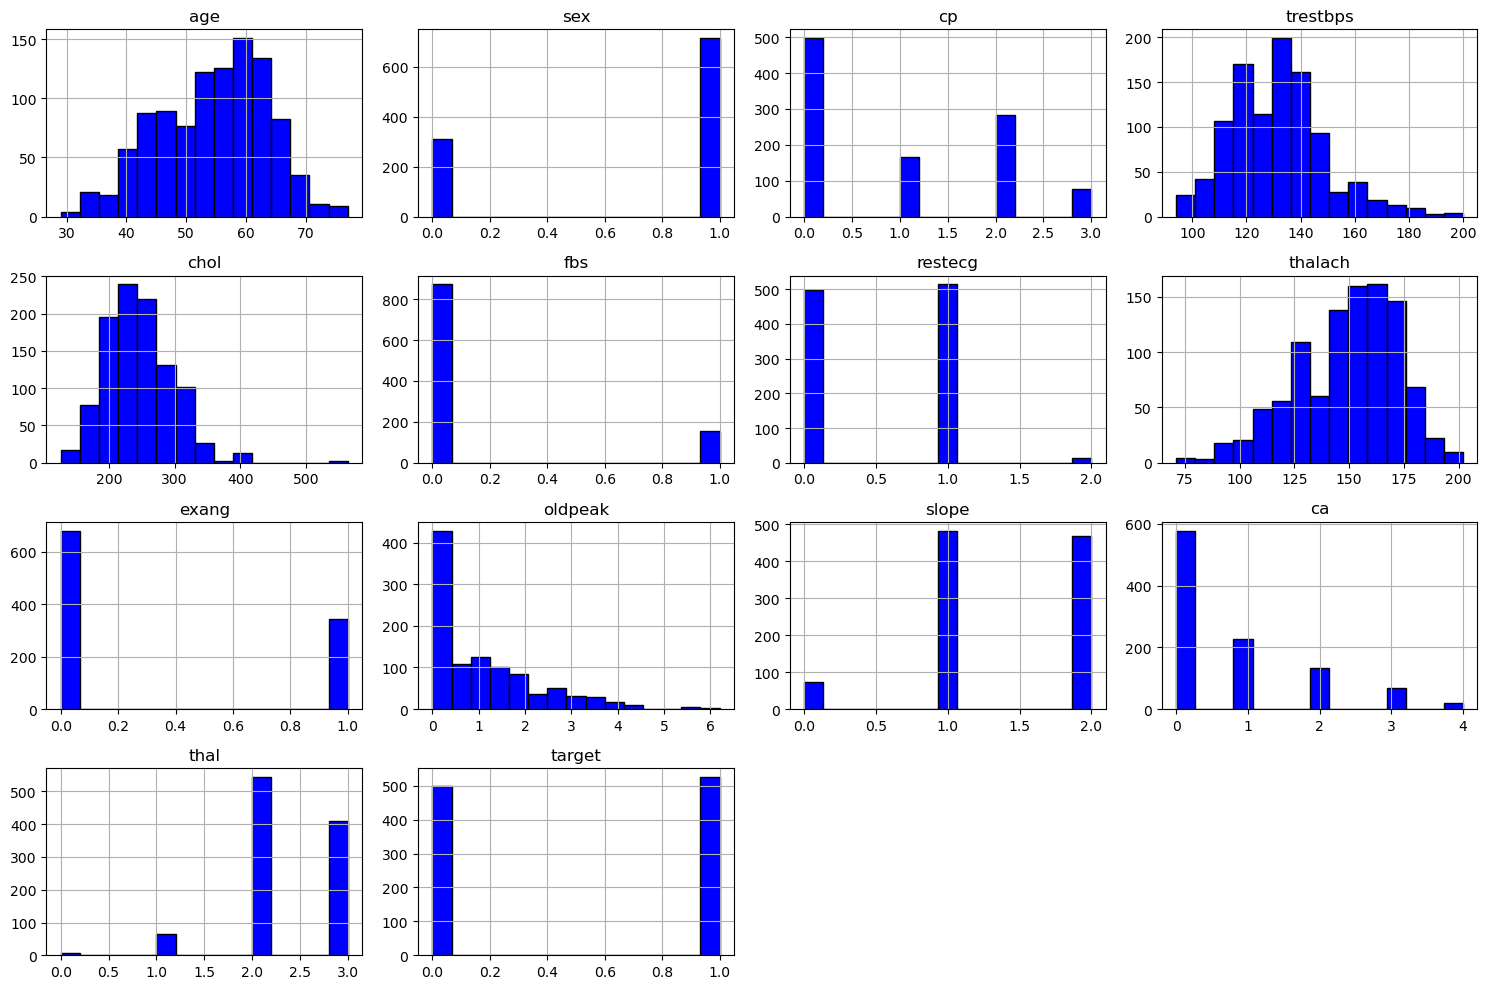

In [8]:
df.hist(bins=15, figsize=(15, 10), color='blue', edgecolor='black')
plt.tight_layout()
plt.show()

## IV. Analysing Important Features

Based on Correlation Heatmap, important feature are:
- 'cp': Correlation value = 0.43            (Strong)
- 'thalach': Correlation value = 0.42       (Strong)
- 'exang': Correlation value = -0.44        (Strong)
- 'oldpeak': Correlation value = -0.44      (Strong)
- 'ca': Correlation value = -0.38           (Strong)
- 'slope': Correlation value = 0.35         (Moderate)
- 'thal': Correlation value = - 0.34        (Moderate)

### 1. CP vs Age by Target

In [9]:
df['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

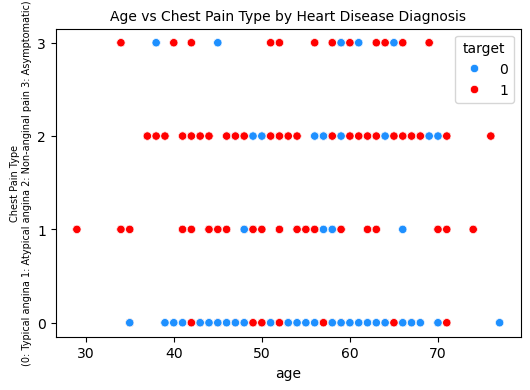

In [10]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['age'], y=df['cp'], hue=df['target'], palette={0: 'dodgerblue', 1: 'red'})
plt.yticks([0, 1, 2, 3])
plt.title('Age vs Chest Pain Type by Heart Disease Diagnosis', fontsize=10)
plt.ylabel('Chest Pain Type\n(0: Typical angina 1: Atypical angina 2: Non-anginal pain 3: Asymptomatic)', fontsize=7)
plt.show()

### 2. Thalach vs Target

In [11]:
df['thalach'].unique()

array([168, 155, 125, 161, 106, 122, 140, 145, 144, 116, 136, 192, 156,
       142, 109, 162, 165, 148, 172, 173, 146, 179, 152, 117, 115, 112,
       163, 147, 182, 105, 150, 151, 169, 166, 178, 132, 160, 123, 139,
       111, 180, 164, 202, 157, 159, 170, 138, 175, 158, 126, 143, 141,
       167,  95, 190, 118, 103, 181, 108, 177, 134, 120, 171, 149, 154,
       153,  88, 174, 114, 195, 133,  96, 124, 131, 185, 194, 128, 127,
       186, 184, 188, 130,  71, 137,  99, 121, 187,  97,  90, 129, 113],
      dtype=int64)

C:\Users\tranl\AppData\Local\Temp\ipykernel_13012\878994740.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['target'], y=df['thalach'], palette={'0': 'aqua', '1': 'red'})


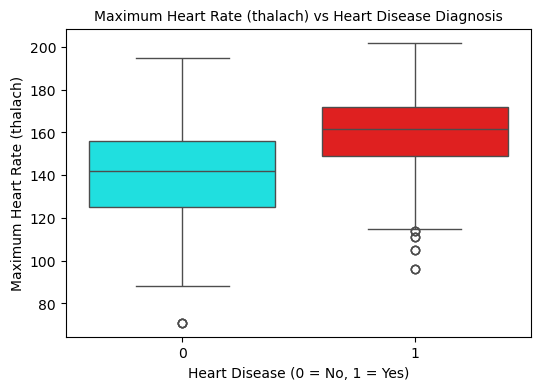

In [12]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['target'], y=df['thalach'], palette={'0': 'aqua', '1': 'red'})
plt.title("Maximum Heart Rate (thalach) vs Heart Disease Diagnosis", fontsize=10)
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Maximum Heart Rate (thalach)")
plt.show()

### 3. Exang vs Target

In [13]:
df['exang'].unique()

array([0, 1], dtype=int64)

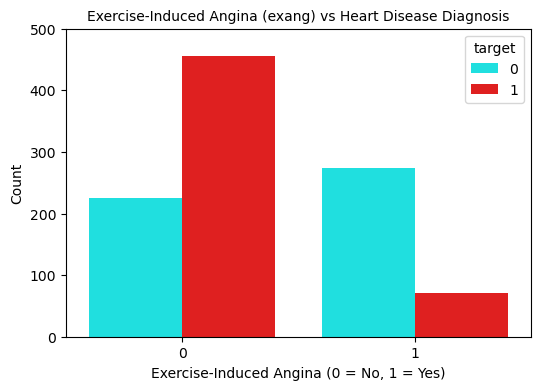

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['exang'], hue=df['target'], palette={0: 'aqua', 1: 'red'})
plt.title("Exercise-Induced Angina (exang) vs Heart Disease Diagnosis", fontsize=10)
plt.xlabel("Exercise-Induced Angina (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.ylim(0, 500)
plt.show()

### 4. Oldpeak vs Target

In [15]:
df['oldpeak'].unique()

array([1. , 3.1, 2.6, 0. , 1.9, 4.4, 0.8, 3.2, 1.6, 3. , 0.7, 4.2, 1.5,
       2.2, 1.1, 0.3, 0.4, 0.6, 3.4, 2.8, 1.2, 2.9, 3.6, 1.4, 0.2, 2. ,
       5.6, 0.9, 1.8, 6.2, 4. , 2.5, 0.5, 0.1, 2.1, 2.4, 3.8, 2.3, 1.3,
       3.5])

C:\Users\tranl\AppData\Local\Temp\ipykernel_13012\1194055791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['target'], y=df['oldpeak'], palette={'0': 'aqua', '1': 'red'})


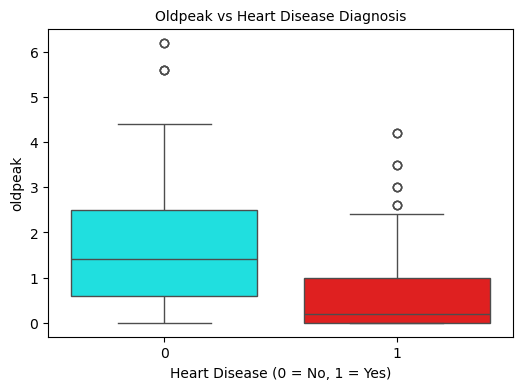

In [16]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['target'], y=df['oldpeak'], palette={'0': 'aqua', '1': 'red'})
plt.title("Oldpeak vs Heart Disease Diagnosis", fontsize=10)
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.show()

### 5. CA vs Target

In [17]:
df['ca'].unique()

array([2, 0, 1, 3, 4], dtype=int64)

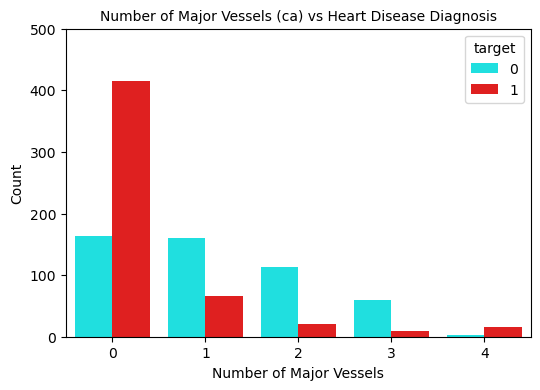

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['ca'], hue=df['target'], palette={0: 'aqua', 1: 'red'})
plt.title("Number of Major Vessels (ca) vs Heart Disease Diagnosis", fontsize=10)
plt.xlabel("Number of Major Vessels")
plt.ylabel("Count")
plt.ylim(0, 500)
plt.show()

### 6. Pair plot

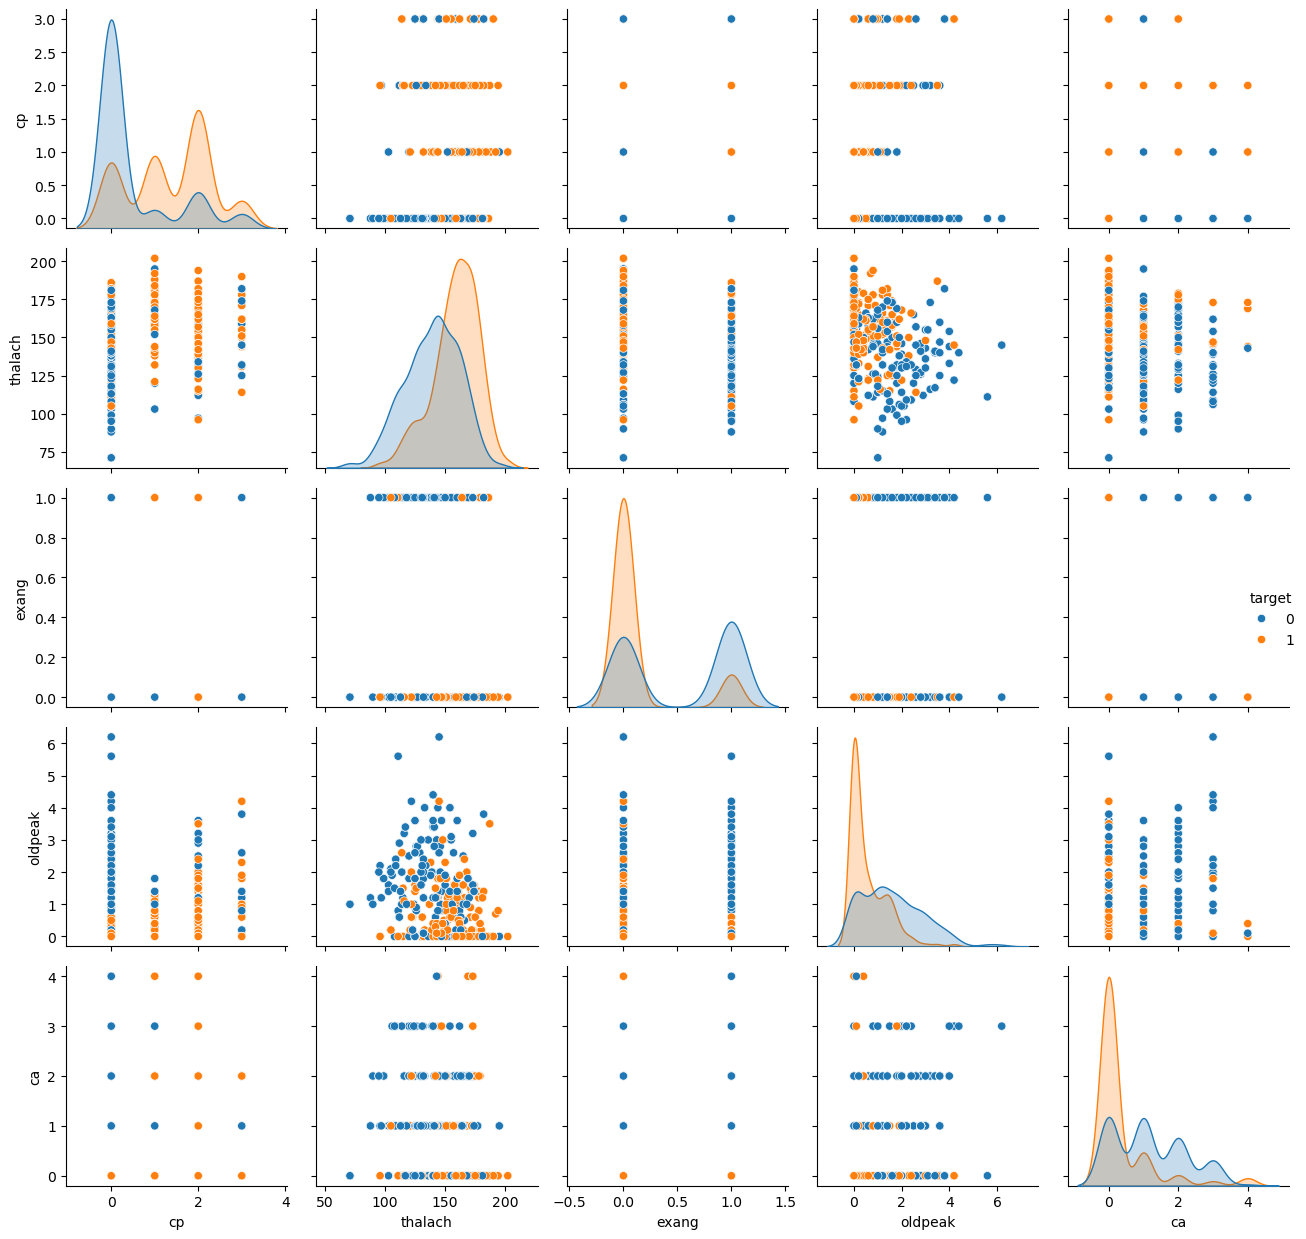

In [19]:
sns.pairplot(df[['cp', 'thalach', 'exang', 'oldpeak', 'ca', 'target']], hue='target', diag_kind='kde')
plt.tight_layout()
plt.show()

## V. Building model

### 1. Take care of dataset

In [20]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
df.duplicated().sum()

723

In [ ]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


### 2. Splitting dataset into Training set and Test set

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 3. Features Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print(f'X Train after scaling:\n{X_train}')
print(f'X Test after scaling:\n{X_test}')

X Train after scaling:
[[-0.58584022  0.65465367  1.008275   ...  1.00526437  2.17169136
  -0.54519316]
 [ 1.05147737 -1.52752523 -0.91672034 ...  1.00526437 -0.7254674
  -0.54519316]
 [-0.04006769 -1.52752523  1.008275   ...  1.00526437 -0.7254674
  -0.54519316]
 ...
 [-0.36753121  0.65465367 -0.91672034 ...  1.00526437 -0.7254674
   1.11057867]
 [-1.24076726  0.65465367 -0.91672034 ...  1.00526437 -0.7254674
   1.11057867]
 [-0.2583767   0.65465367 -0.91672034 ...  1.00526437  0.24025219
  -0.54519316]]
X Test after scaling:
[[ 0.84085106 -1.45122728 -0.91353848 ...  0.96140241 -0.75892361
  -0.44369552]
 [-0.19616111 -1.45122728  1.11106031 ...  0.96140241 -0.75892361
  -3.37781108]
 [ 0.03428604  0.68907194 -0.91353848 ... -0.56640762  0.2320276
   1.02336226]
 ...
 [-1.23317329  0.68907194  1.11106031 ...  0.96140241 -0.75892361
  -0.44369552]
 [ 0.72562749  0.68907194 -0.91353848 ...  0.96140241  0.2320276
   1.02336226]
 [ 0.37995676  0.68907194  1.11106031 ... -0.56640762  0.23

### 4. Training and Evaluating 

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

LogisticRegre = LogisticRegression()
RandomForest = RandomForestClassifier()
svc = SVC()
DecisionTree = DecisionTreeClassifier()

#### Logistic Regression Model

In [66]:
LogisticRegre.fit(X_train, y_train)

Logistic_predict = LogisticRegre.predict(X_test)
Logistic_accuracy = np.round(accuracy_score(y_test, Logistic_predict), 2)

print(f'Logistic Regression Accuracy Score: {Logistic_accuracy}')

Logistic Regression Accuracy Score: 0.78


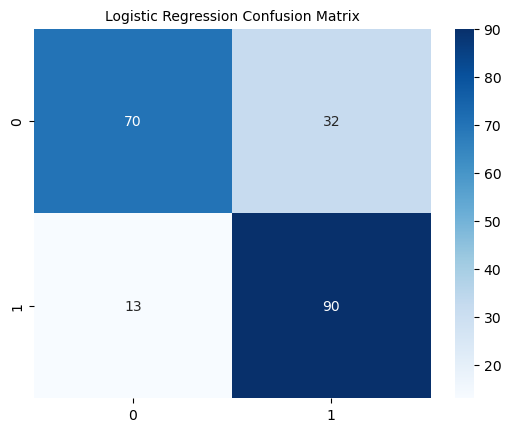

In [27]:
LogisticConfusionMatrix = confusion_matrix(y_test, Logistic_predict)

sns.heatmap(LogisticConfusionMatrix, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix', fontsize=10)
plt.show()

In [50]:
Logistic_dict = classification_report(y_test, Logistic_predict, output_dict=True)

Logistic_array = np.array([list(Logistic_dict[str(i)].values()) for i in range(len(Logistic_dict) - 3)])

Logistic_mean = np.round(np.mean(Logistic_array, axis=0), 2)

Logistic_mean

array([  0.79,   0.78,   0.78, 102.5 ])

#### Random Forest Model

In [67]:
RandomForest.fit(X_train, y_train)

RandomForest_predict = RandomForest.predict(X_test)
RandomForest_accuracy = np.round(accuracy_score(y_test, RandomForest_predict), 2)

print(f'Random Forest Accuracy Score: {RandomForest_accuracy}')

Random Forest Accuracy Score: 0.99


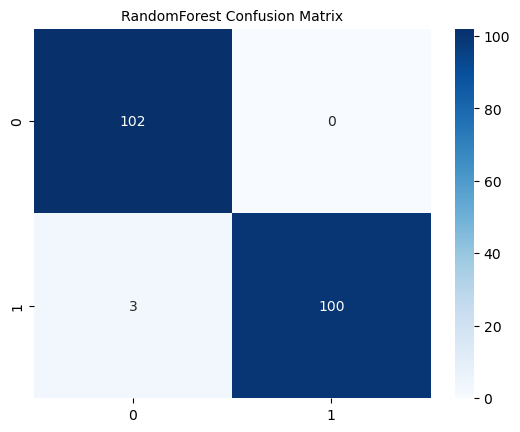

In [30]:
RandomForestConfusionMatrix = confusion_matrix(y_test, RandomForest_predict)

sns.heatmap(RandomForestConfusionMatrix, annot=True, fmt='d', cmap='Blues')
plt.title('RandomForest Confusion Matrix', fontsize=10)
plt.show()

In [51]:
RandomForest_dict = classification_report(y_test, RandomForest_predict, output_dict=True)

RandomForest_array = np.array([list(RandomForest_dict[str(i)].values()) for i in range(len(RandomForest_dict) - 3)])

RandomForest_mean = np.round(np.mean(RandomForest_array, axis=0), 2)

RandomForest_mean

array([  0.99,   0.99,   0.99, 102.5 ])

#### Decision Tree Model

In [68]:
DecisionTree.fit(X_train, y_train)

DecisionTree_predict = DecisionTree.predict(X_test)
DecisionTree_accuracy = np.round(accuracy_score(y_test, DecisionTree_predict), 2)

print(f'Decision Tree Accuracy Score: {DecisionTree_accuracy}')

Decision Tree Accuracy Score: 0.96


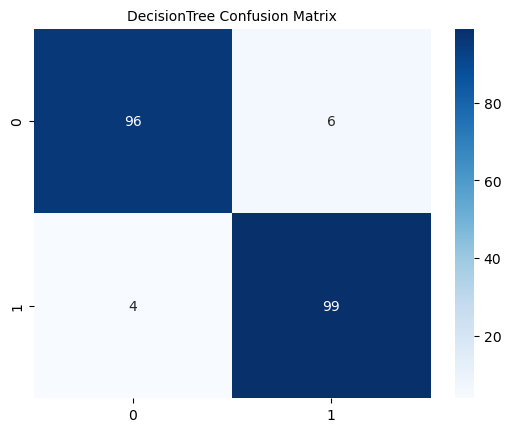

In [33]:
DecisionTreeConfusionMatrix = confusion_matrix(y_test, DecisionTree_predict)

sns.heatmap(DecisionTreeConfusionMatrix, annot=True, fmt='d', cmap='Blues')
plt.title('DecisionTree Confusion Matrix', fontsize=10)
plt.show()

In [52]:
DecisionTree_dict = classification_report(y_test, DecisionTree_predict, output_dict=True)

DecisionTree_array = np.array([list(DecisionTree_dict[str(i)].values()) for i in range(len(DecisionTree_dict) - 3)])

DecisionTree_mean = np.round(np.mean(DecisionTree_array, axis=0), 2)

DecisionTree_mean

array([  0.95,   0.95,   0.95, 102.5 ])

#### Support Vector Classification

In [34]:
svc.fit(X_train, y_train)

svc_predict = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predict)

print(f'SVC Accuracy Score: {svc_accuracy:.4f}')

SVC Accuracy Score: 0.8927


In [36]:
from sklearn.model_selection import GridSearchCV

SVCParam = {'C':[0.1, 1, 10, 30, 100, 300, 1000, 3000 , 10000],
            'gamma':[1, 0.3, 0.1, 0.01, 0.03, 0.001, 0.003],
            'kernel':['rbf','sigmoid','linear']
           }

SVCGrided = GridSearchCV(svc, SVCParam, refit = True, verbose = 5, cv=5, scoring='accuracy')
SVCGrided.fit(X_train,y_train)

Fitting 5 folds for each of 189 candidates, totalling 945 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.518 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.518 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.518 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.732 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.744 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.701 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.713 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.628 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.835 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linea

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 30, 100, 300, 1000, 3000, 10000],
                         'gamma': [1, 0.3, 0.1, 0.01, 0.03, 0.001, 0.003],
                         'kernel': ['rbf', 'sigmoid', 'linear']},
             scoring='accuracy', verbose=5)

In [69]:
SVCGrided_predict = SVCGrided.predict(X_test)
SVCGrided_accuracy = np.round(accuracy_score(y_test, SVCGrided_predict), 2)

print(f'SVCGrided Accuracy Score: {SVCGrided_accuracy}')

SVCGrided Accuracy Score: 0.97


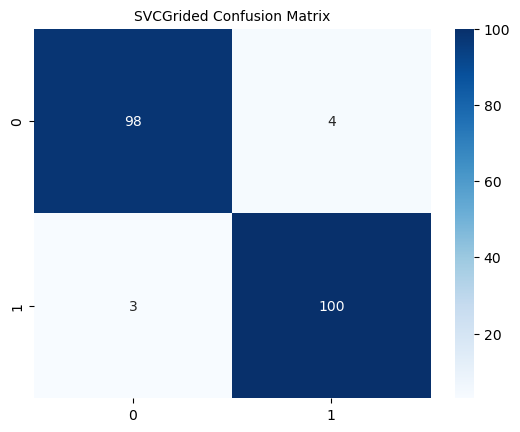

In [39]:
SVCGridedConfusionMatrix = confusion_matrix(y_test, SVCGrided_predict)

sns.heatmap(SVCGridedConfusionMatrix, annot=True, fmt='d', cmap='Blues')
plt.title('SVCGrided Confusion Matrix', fontsize=10)
plt.show()

In [53]:
SVCGrided_dict = classification_report(y_test, SVCGrided_predict, output_dict=True)

SVCGrided_array = np.array([list(SVCGrided_dict[str(i)].values()) for i in range(len(SVCGrided_dict) - 3)])

SVCGrided_mean = np.round(np.mean(SVCGrided_array, axis=0), 2)

SVCGrided_mean

array([  0.97,   0.97,   0.97, 102.5 ])

### 5. Evaluating Models

In [70]:
dict = {'model': ['Logistic Regression', 'Random Forest', 'DecisionTree', 'SVCGrided'],
        'accuracy': [Logistic_accuracy, RandomForest_accuracy, DecisionTree_accuracy, SVCGrided_accuracy],
        'Precision': [Logistic_mean[0], RandomForest_mean[0], DecisionTree_mean[0], SVCGrided_mean[0]],
        'Recall': [Logistic_mean[1], RandomForest_mean[1], DecisionTree_mean[1], SVCGrided_mean[1]],
        'F1-score': [Logistic_mean[2], RandomForest_mean[2], DecisionTree_mean[2], SVCGrided_mean[2]]}

evaluateDataFrame = pd.DataFrame(dict)
evaluateDataFrame

,model,accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.78,0.79,0.78,0.78
1,Random Forest,0.99,0.99,0.99,0.99
2,DecisionTree,0.96,0.95,0.95,0.95
3,SVCGrided,0.97,0.97,0.97,0.97


In [71]:
evaluateDataFrame = evaluateDataFrame.sort_values(by='accuracy', ascending=False)
evaluateDataFrame

,model,accuracy,Precision,Recall,F1-score
1,Random Forest,0.99,0.99,0.99,0.99
3,SVCGrided,0.97,0.97,0.97,0.97
2,DecisionTree,0.96,0.95,0.95,0.95
0,Logistic Regression,0.78,0.79,0.78,0.78


#### Accuracy Visualization

C:\Users\tranl\AppData\Local\Temp\ipykernel_13012\2338843283.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='accuracy', y='model', data=evaluateDataFrame, palette='coolwarm')


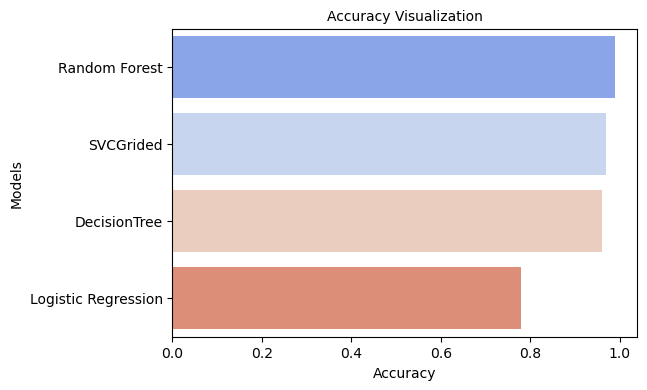

In [73]:
plt.figure(figsize=(6, 4))
sns.barplot(x='accuracy', y='model', data=evaluateDataFrame, palette='coolwarm')
plt.title('Accuracy Visualization', fontsize=10)
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.show()

#### Precision Visualization

C:\Users\tranl\AppData\Local\Temp\ipykernel_13012\1601936269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Precision', y='model', data=evaluateDataFrame, palette='viridis')


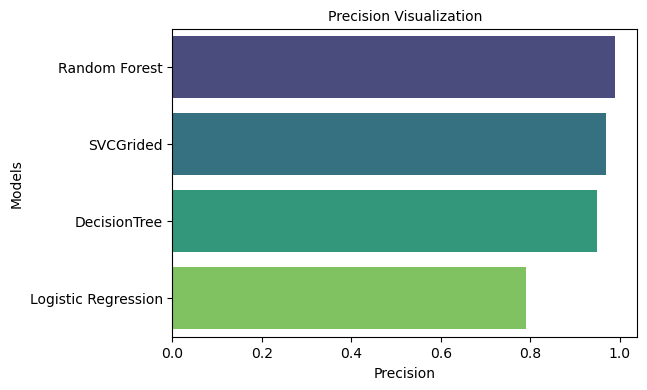

In [75]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Precision', y='model', data=evaluateDataFrame, palette='viridis')
plt.title('Precision Visualization', fontsize=10)
plt.xlabel('Precision')
plt.ylabel('Models')
plt.show()

#### Recall Visualization

C:\Users\tranl\AppData\Local\Temp\ipykernel_13012\2585818230.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recall', y='model', data=evaluateDataFrame, palette='magma')


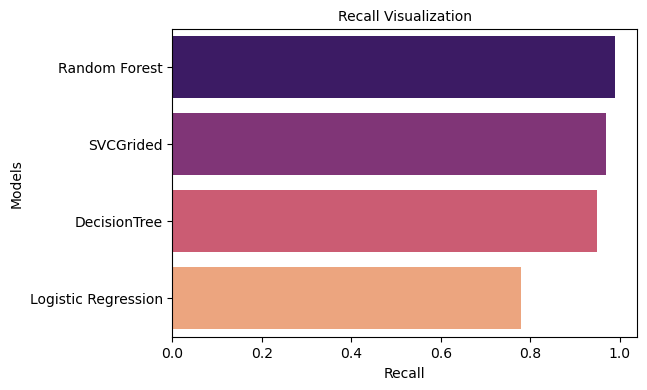

In [76]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Recall', y='model', data=evaluateDataFrame, palette='magma')
plt.title('Recall Visualization', fontsize=10)
plt.xlabel('Recall')
plt.ylabel('Models')
plt.show()

#### F1-score Visualization

C:\Users\tranl\AppData\Local\Temp\ipykernel_13012\1611328582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F1-score', y='model', data=evaluateDataFrame, palette='viridis')


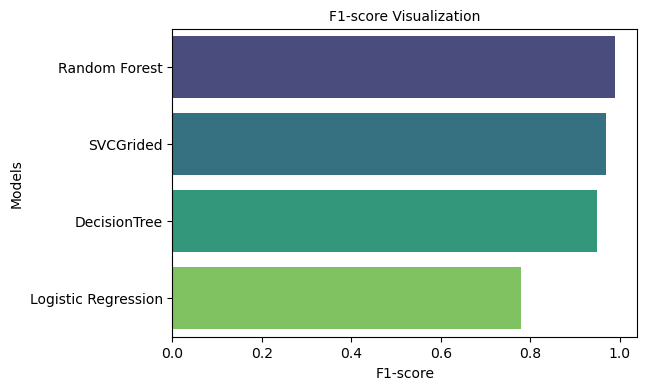

In [77]:
plt.figure(figsize=(6, 4))
sns.barplot(x='F1-score', y='model', data=evaluateDataFrame, palette='viridis')
plt.title('F1-score Visualization', fontsize=10)
plt.xlabel('F1-score')
plt.ylabel('Models')
plt.show()

### 6. The Best Model

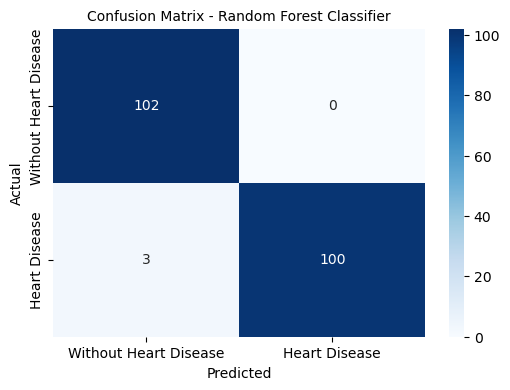

In [79]:
plt.figure(figsize=(6, 4))
sns.heatmap(RandomForestConfusionMatrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Without Heart Disease', 'Heart Disease'],
            yticklabels=['Without Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - Random Forest Classifier', fontsize=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [80]:
print(classification_report(y_test, RandomForest_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [81]:
import joblib

joblib.dump(RandomForest, 'RandomForestModel.pkl')

['RandomForestModel.pkl']